# Introduction

## Heart Disease
In this notebook, we will try to answer some questions regarding heart disease as well as try to devise a way to predict whether or not a patient may have heart disease. We will attempt to determine what factors may cause heart disease or at least have some correlation to heart disease.

### What is Heart Disease
Heart disease is a general term that refers to many types of heart conditions, including coronary artery disease (CAD), arrhythmia, heart valve disease, and heart failure. CAD is the most common type of heart disease in the United States. It affects the major blood vessels that supply the heart muscle. Decreased blood flow to the heart can cause a heart attack.

Once diagnosed with heart disease, it can't be cured. However, you can treat the things that contributed to the development of coronary artery disease, which can reduce how the condition impacts your body.

According to CDC statistics:
- One person dies EVERY 33 seconds from Heart Disease in the United States
- 695,000 people in the United States died from heart disease in 2021—that’s 1 in every 5 deaths
- Heart disease cost the United States about $239.9 billion each year from 2018 to 2019.3 This includes the cost of health care services, medicines, and lost productivity due to death

As you can see, Heart Disease is a major worry for alot of people in the United States. It effects many millions of people, either directly or indirectly. Preventing this disease or at least catching it early,  combined with latest treatments and lifestyle changes can result in major strides in longevity of live as well as quality of life well into older age.

# Data Wrangling
Import Data and make any necessary modifications in order to be able to work with the data.

In [1]:
# Import libraries to be used
import pandas as pd

# Read the data from the csv file
df = pd.read_csv('HD_cleaned.csv')
df.head()

General_Health                  Checkup Exercise Skin_Cancer Other_Cancer  \
0           Poor  Within the past 2 years       No          No           No   
1      Very Good     Within the past year       No          No           No   
2      Very Good     Within the past year      Yes          No           No   
3           Poor     Within the past year      Yes          No           No   
4           Good     Within the past year       No          No           No   

  Depression Diabetes Arthritis     Sex Age_Category  Height_(cm)  \
0         No       No       Yes  Female        70-74          150   
1         No      Yes        No  Female        70-74          165   
2         No      Yes        No  Female        60-64          163   
3         No      Yes        No    Male        75-79          180   
4         No       No        No    Male          80+          191   

   Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0        32.66  14.54             Yes                    0                 30   
1        77.11  28.29              No                    0                 30   
2        88.45  33.47              No                    4                 12   
3        93.44  28.73              No                    0                 30   
4        88.45  24.37             Yes                    0                  8   

   Green_Vegetables_Consumption  FriedPotato_Consumption Heart_Disease  
0                            16                       12            No  
1                             0                        4           Yes  
2                             3                       16            No  
3                            30                        8           Yes  
4                             4                        0            No

In [2]:
# Shape
print("Shape:", df.shape)

Shape: (308854, 19)


In [3]:
# Data Types
print("Data Types:")
print(df.dtypes)

Data Types:
General_Health                   object
Checkup                          object
Exercise                         object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
Heart_Disease                    object
dtype: object


In [4]:
# Missing Data
print("Missing Data:")
print(df.isnull().sum())

Missing Data:
General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Heart_Disease                   0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training (90%) and validation (10%) sets
training_data, validation_data = train_test_split(df, test_size=0.1, random_state=42)

print('Training set:', training_data.shape)
print('Validation set:', validation_data.shape)

Training set: (277968, 19)
Validation set: (30886, 19)


In [6]:
training_data.head()

General_Health                  Checkup Exercise Skin_Cancer  \
14893       Excellent     Within the past year      Yes          No   
24750            Poor     Within the past year      Yes          No   
58895            Good  Within the past 2 years      Yes          No   
43176       Excellent     Within the past year      Yes          No   
147013           Good     Within the past year      Yes          No   

       Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
14893            No        Yes       No        No    Male        18-24   
24750            No         No       No       Yes  Female        60-64   
58895           Yes         No       No        No  Female        55-59   
43176            No         No       No        No    Male        18-24   
147013           No        Yes       No        No  Female        25-29   

        Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
14893           178        58.97  18.65              No                    0   
24750           170        77.11  26.63             Yes                    4   
58895           168        68.04  24.21             Yes                   30   
43176           175        53.52  17.43              No                    0   
147013          160        56.70  22.14              No                    0   

        Fruit_Consumption  Green_Vegetables_Consumption  \
14893                  12                            60   
24750                  20                            10   
58895                  12                             2   
43176                  20                            15   
147013                 30                             3   

        FriedPotato_Consumption Heart_Disease  
14893                         4            No  
24750                        10           Yes  
58895                        12            No  
43176                        10            No  
147013                       10            No

In [7]:
validation_data.head()

General_Health               Checkup Exercise Skin_Cancer Other_Cancer  \
302051      Very Good  Within the past year      Yes          No           No   
59950       Very Good  Within the past year       No          No           No   
203639           Good  Within the past year       No          No           No   
78768       Very Good  Within the past year      Yes          No           No   
216156           Fair  Within the past year      Yes         Yes           No   

       Depression                                 Diabetes Arthritis     Sex  \
302051         No                                       No       Yes    Male   
59950          No                                       No       Yes  Female   
203639         No                                       No       Yes  Female   
78768          No                                       No        No    Male   
216156        Yes  No, pre-diabetes or borderline diabetes       Yes  Female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
302051        60-64          178        86.18  27.26              No   
59950         70-74          165        79.38  29.12              No   
203639        60-64          168        72.57  25.82             Yes   
78768         25-29          183        93.89  28.07             Yes   
216156        55-59          160        54.43  21.26             Yes   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
302051                   12                 30                            16   
59950                     0                 60                            60   
203639                    6                  0                            20   
78768                     0                 60                             8   
216156                    0                 20                             6   

        FriedPotato_Consumption Heart_Disease  
302051                        8            No  
59950                        12            No  
203639                        0            No  
78768                         2            No  
216156                       15            No

In [8]:
from autoviz.AutoViz_Class import AutoViz_Class

# # Initialize AutoViz
# AV = AutoViz_Class()

# # Run AutoViz on the training_data DataFrame
# report_before_setup = AV.AutoViz(filename="",
#     dfte=training_data,
#     verbose=1
# )

Imported v0.1.730. After importing autoviz, execute '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [9]:
# from autoviz.AutoViz_Class import AutoViz_Class

# # Initialize AutoViz
# AV = AutoViz_Class()

# # Run AutoViz on the training_data DataFrame
# report_before_setup2 = AV.AutoViz(filename="", dfte=validation_data, verbose=1)


In [10]:
training_data.head()

General_Health         Checkup          Exercise Skin_Cancer  \
14893     Excellent       Within the past year    Yes        No       
24750          Poor       Within the past year    Yes        No       
58895          Good    Within the past 2 years    Yes        No       
43176     Excellent       Within the past year    Yes        No       
147013         Good       Within the past year    Yes        No       

       Other_Cancer Depression Diabetes Arthritis   Sex   Age_Category  \
14893        No         Yes       No         No      Male     18-24      
24750        No          No       No        Yes    Female     60-64      
58895       Yes          No       No         No    Female     55-59      
43176        No          No       No         No      Male     18-24      
147013       No         Yes       No         No    Female     25-29      

        Height_(cm)  Weight_(kg)   BMI  Smoking_History  Alcohol_Consumption  \
14893       178         58.97     18.65         No                0            
24750       170         77.11     26.63        Yes                4            
58895       168         68.04     24.21        Yes               30            
43176       175         53.52     17.43         No                0            
147013      160         56.70     22.14         No                0            

        Fruit_Consumption  Green_Vegetables_Consumption  \
14893          12                       60                
24750          20                       10                
58895          12                        2                
43176          20                       15                
147013         30                        3                

        FriedPotato_Consumption Heart_Disease  
14893              4                   No      
24750             10                  Yes      
58895             12                   No      
43176             10                   No      
147013            10                   No

In [11]:
training_data.shape

(277968, 19)

In [12]:
from pycaret.classification import *

# Setup the experiment
clf1 = setup(
    data=training_data,
    target='Heart_Disease',
    normalize=True,
    remove_outliers=True,
    fix_imbalance=True,
    session_id=123
)

# Exploratory Data Analysis

In [13]:
# Import EDA profiling report tools
# from ydata_profiling import ProfileReport

# train_profile = ProfileReport(training_data, title="Profiling Report", dark_mode=True)
# train_profile

In [14]:
# train_profile.to_file('Train_HD_EDA_Profile.html')

In [15]:
# val_profile = ProfileReport(validation_data, title="Profiling Report", dark_mode=True)
# val_profile

In [16]:
# val_profile.to_file('Val_HD_EDA_Profile.html')

In [17]:
# Drop the "Checkup" column

training_data = training_data.drop(columns=['Checkup'])
validation_data = validation_data.drop(columns=['Checkup'])

In [18]:
# Combine 'Yes, but female told only during pregnancy' with 'Yes' in the "Diabetes" column in training_data
# Combine 'No, pre-diabetes or borderline diabetes' with 'No' in the "Diabetes" column in training_data
training_data['Diabetes'] = training_data['Diabetes'].replace('Yes, but female told only during pregnancy', 'Yes')
training_data['Diabetes'] = training_data['Diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No')

In [19]:
# Cap the data at the suggested upper and lower bounds
training_data['Height_(cm)'] = training_data['Height_(cm)'].clip(lower=140.5, upper=200.5)
training_data['Weight_(kg)'] = training_data['Weight_(kg)'].clip(lower=27.23, upper=136.06)
training_data['BMI'] = training_data['BMI'].clip(lower=12.77, upper=43.28)
training_data['Alcohol_Consumption'] = training_data['Alcohol_Consumption'].clip(lower=-9, upper=15)
training_data['Fruit_Consumption'] = training_data['Fruit_Consumption'].clip(lower=-15, upper=57)
training_data['Green_Vegetables_Consumption'] = training_data['Green_Vegetables_Consumption'].clip(lower=-20, upper=44)
training_data['FriedPotato_Consumption'] = training_data['FriedPotato_Consumption'].clip(lower=-7, upper=17)

# Preview the training data
training_data.head()

General_Health Exercise Skin_Cancer Other_Cancer Depression Diabetes  \
14893     Excellent      Yes        No           No         Yes       No      
24750          Poor      Yes        No           No          No       No      
58895          Good      Yes        No          Yes          No       No      
43176     Excellent      Yes        No           No          No       No      
147013         Good      Yes        No           No         Yes       No      

       Arthritis   Sex   Age_Category  Height_(cm)  Weight_(kg)   BMI   \
14893       No      Male     18-24        178.0        58.97     18.65   
24750      Yes    Female     60-64        170.0        77.11     26.63   
58895       No    Female     55-59        168.0        68.04     24.21   
43176       No      Male     18-24        175.0        53.52     17.43   
147013      No    Female     25-29        160.0        56.70     22.14   

       Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
14893          No                0                  12           
24750         Yes                4                  20           
58895         Yes               15                  12           
43176          No                0                  20           
147013         No                0                  30           

        Green_Vegetables_Consumption  FriedPotato_Consumption Heart_Disease  
14893                44                          4                   No      
24750                10                         10                  Yes      
58895                 2                         12                   No      
43176                15                         10                   No      
147013                3                         10                   No

In [20]:
# Combine 'Yes, but female told only during pregnancy' with 'Yes' in the "Diabetes" column in training_data
# Combine 'No, pre-diabetes or borderline diabetes' with 'No' in the "Diabetes" column in training_data
validation_data['Diabetes'] = validation_data['Diabetes'].replace('Yes, but female told only during pregnancy', 'Yes')
validation_data['Diabetes'] = validation_data['Diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No')

In [21]:
# Cap the data at the suggested upper and lower bounds for the validation data
validation_data['Height_(cm)'] = validation_data['Height_(cm)'].clip(lower=140.5, upper=200.5)
validation_data['Weight_(kg)'] = validation_data['Weight_(kg)'].clip(lower=27.23, upper=136.06)
validation_data['BMI'] = validation_data['BMI'].clip(lower=12.77, upper=43.28)
validation_data['Alcohol_Consumption'] = validation_data['Alcohol_Consumption'].clip(lower=-9, upper=15)
validation_data['Fruit_Consumption'] = validation_data['Fruit_Consumption'].clip(lower=-15, upper=57)
validation_data['Green_Vegetables_Consumption'] = validation_data['Green_Vegetables_Consumption'].clip(lower=-20, upper=44)
validation_data['FriedPotato_Consumption'] = validation_data['FriedPotato_Consumption'].clip(lower=-7, upper=17)

# Preview the validation data
validation_data.head()

General_Health Exercise Skin_Cancer Other_Cancer Depression Diabetes  \
302051    Very Good      Yes         No         No           No       No      
59950     Very Good       No         No         No           No       No      
203639         Good       No         No         No           No       No      
78768     Very Good      Yes         No         No           No       No      
216156         Fair      Yes        Yes         No          Yes       No      

       Arthritis   Sex   Age_Category  Height_(cm)  Weight_(kg)   BMI   \
302051     Yes      Male     60-64        178.0        86.18     27.26   
59950      Yes    Female     70-74        165.0        79.38     29.12   
203639     Yes    Female     60-64        168.0        72.57     25.82   
78768       No      Male     25-29        183.0        93.89     28.07   
216156     Yes    Female     55-59        160.0        54.43     21.26   

       Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
302051         No               12                  30           
59950          No                0                  57           
203639        Yes                6                   0           
78768         Yes                0                  57           
216156        Yes                0                  20           

        Green_Vegetables_Consumption  FriedPotato_Consumption Heart_Disease  
302051               16                          8                  No       
59950                44                         12                  No       
203639               20                          0                  No       
78768                 8                          2                  No       
216156                6                         15                  No

In [22]:
# Dropping the BMI column from both the training and validation datasets because it is highly correlated with the Weight column
training_data = training_data.drop(columns=['BMI'])
validation_data = validation_data.drop(columns=['BMI'])

# Checking the updated shape of the training and validation datasets
training_data.shape, validation_data.shape


((277968, 17), (30886, 17))

In [23]:
training_data.head()

General_Health Exercise Skin_Cancer Other_Cancer Depression Diabetes  \
14893     Excellent      Yes        No           No         Yes       No      
24750          Poor      Yes        No           No          No       No      
58895          Good      Yes        No          Yes          No       No      
43176     Excellent      Yes        No           No          No       No      
147013         Good      Yes        No           No         Yes       No      

       Arthritis   Sex   Age_Category  Height_(cm)  Weight_(kg)  \
14893       No      Male     18-24        178.0        58.97      
24750      Yes    Female     60-64        170.0        77.11      
58895       No    Female     55-59        168.0        68.04      
43176       No      Male     18-24        175.0        53.52      
147013      No    Female     25-29        160.0        56.70      

       Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
14893          No                0                  12           
24750         Yes                4                  20           
58895         Yes               15                  12           
43176          No                0                  20           
147013         No                0                  30           

        Green_Vegetables_Consumption  FriedPotato_Consumption Heart_Disease  
14893                44                          4                   No      
24750                10                         10                  Yes      
58895                 2                         12                   No      
43176                15                         10                   No      
147013                3                         10                   No

In [24]:
validation_data.head()

General_Health Exercise Skin_Cancer Other_Cancer Depression Diabetes  \
302051    Very Good      Yes         No         No           No       No      
59950     Very Good       No         No         No           No       No      
203639         Good       No         No         No           No       No      
78768     Very Good      Yes         No         No           No       No      
216156         Fair      Yes        Yes         No          Yes       No      

       Arthritis   Sex   Age_Category  Height_(cm)  Weight_(kg)  \
302051     Yes      Male     60-64        178.0        86.18      
59950      Yes    Female     70-74        165.0        79.38      
203639     Yes    Female     60-64        168.0        72.57      
78768       No      Male     25-29        183.0        93.89      
216156     Yes    Female     55-59        160.0        54.43      

       Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
302051         No               12                  30           
59950          No                0                  57           
203639        Yes                6                   0           
78768         Yes                0                  57           
216156        Yes                0                  20           

        Green_Vegetables_Consumption  FriedPotato_Consumption Heart_Disease  
302051               16                          8                  No       
59950                44                         12                  No       
203639               20                          0                  No       
78768                 8                          2                  No       
216156                6                         15                  No

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
To fix data quality issues automatically, import FixDQ from autoviz...
    Alert: Dropping 49 duplicate rows can sometimes cause column data types to change to object. Double-check!


Number of All Scatter Plots = 3


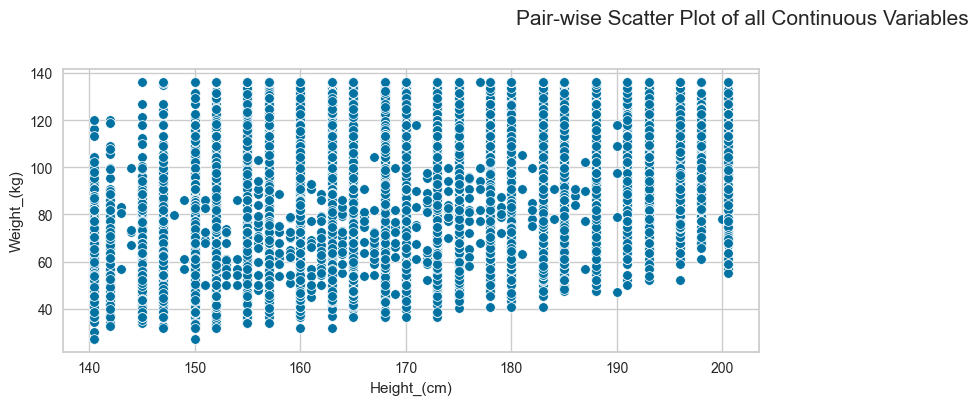

Could not draw Distribution Plot


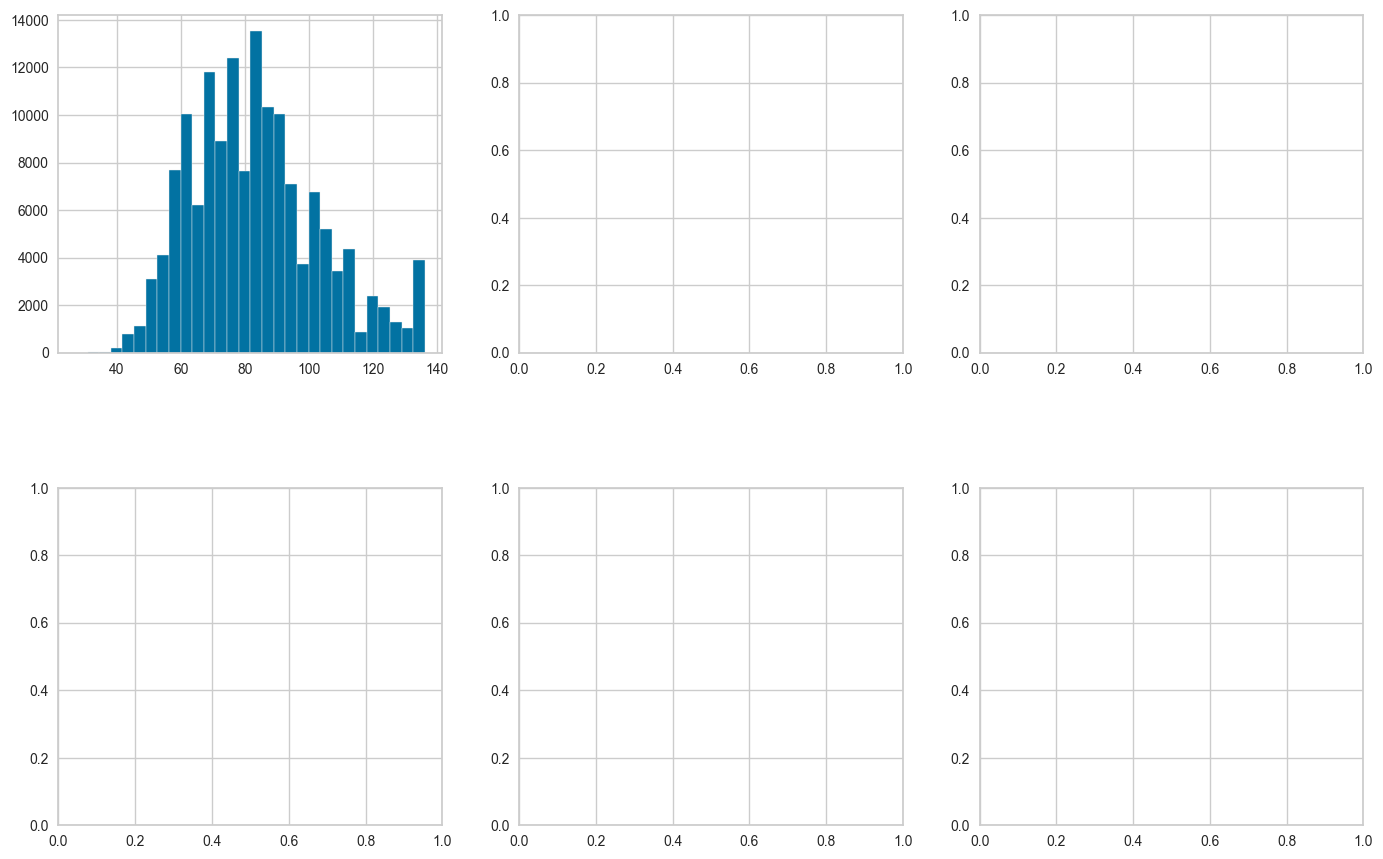

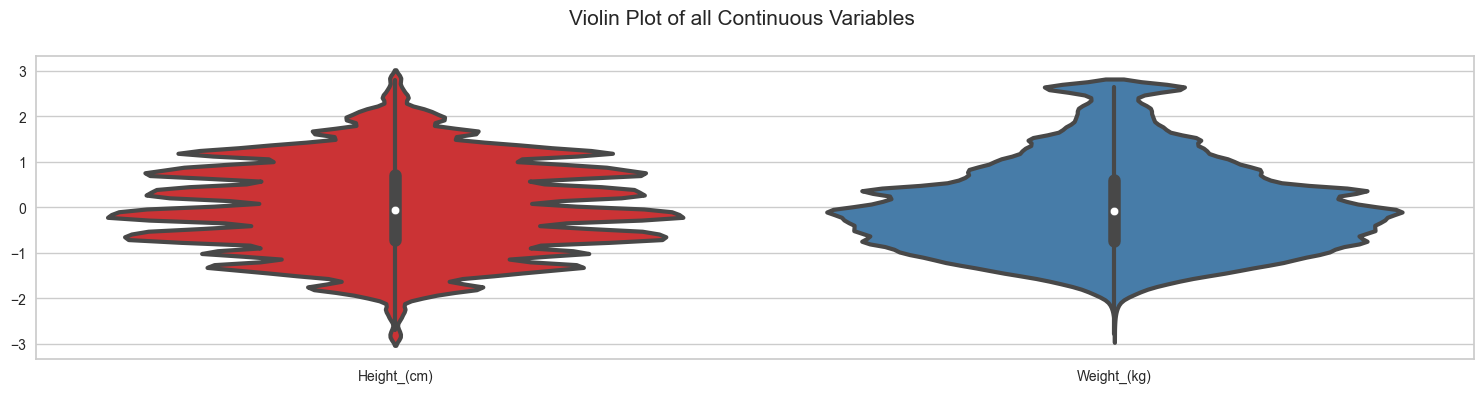

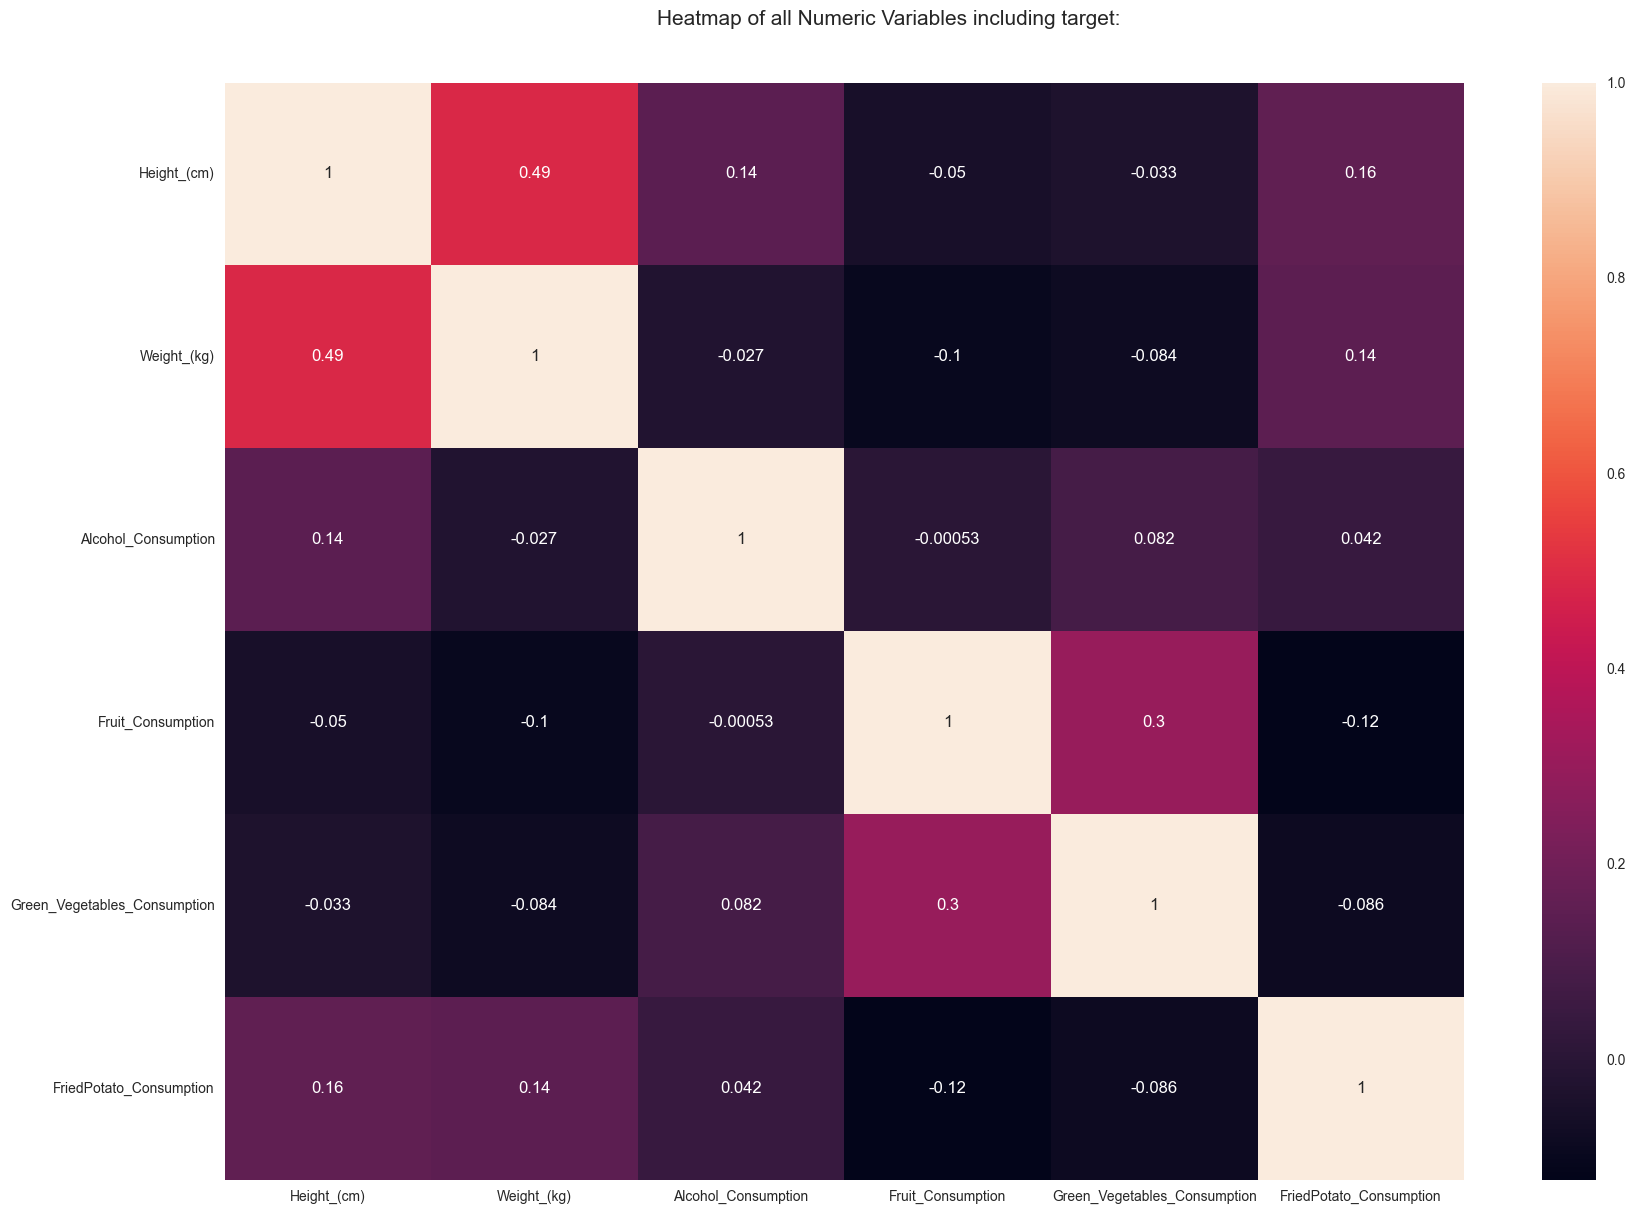

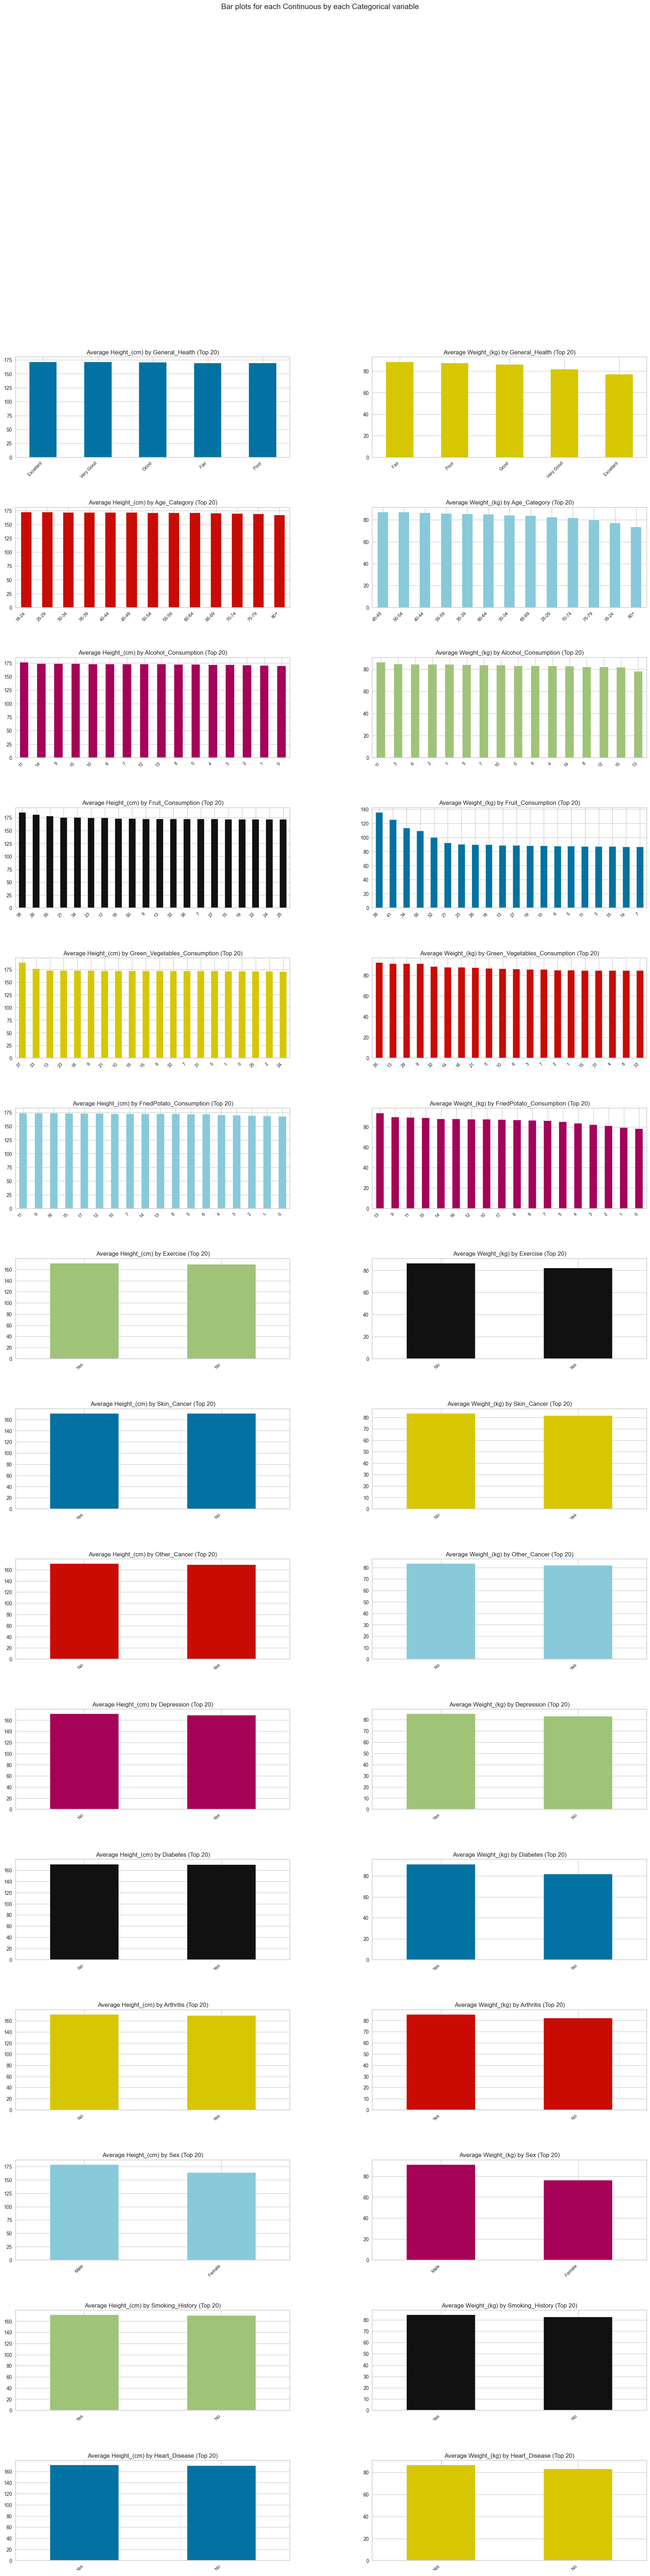

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [25]:
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()

# Run AutoViz on the training_data DataFrame
report_after_processing = AV.AutoViz(filename="", dfte=training_data, verbose=1)

Shape of your Data Set loaded: (30886, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix data quality issues automatically, import FixDQ from autoviz...


Number of All Scatter Plots = 3


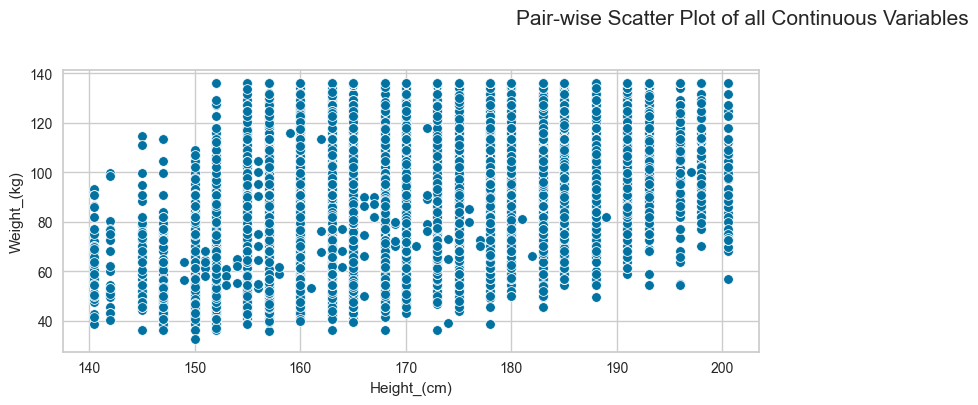

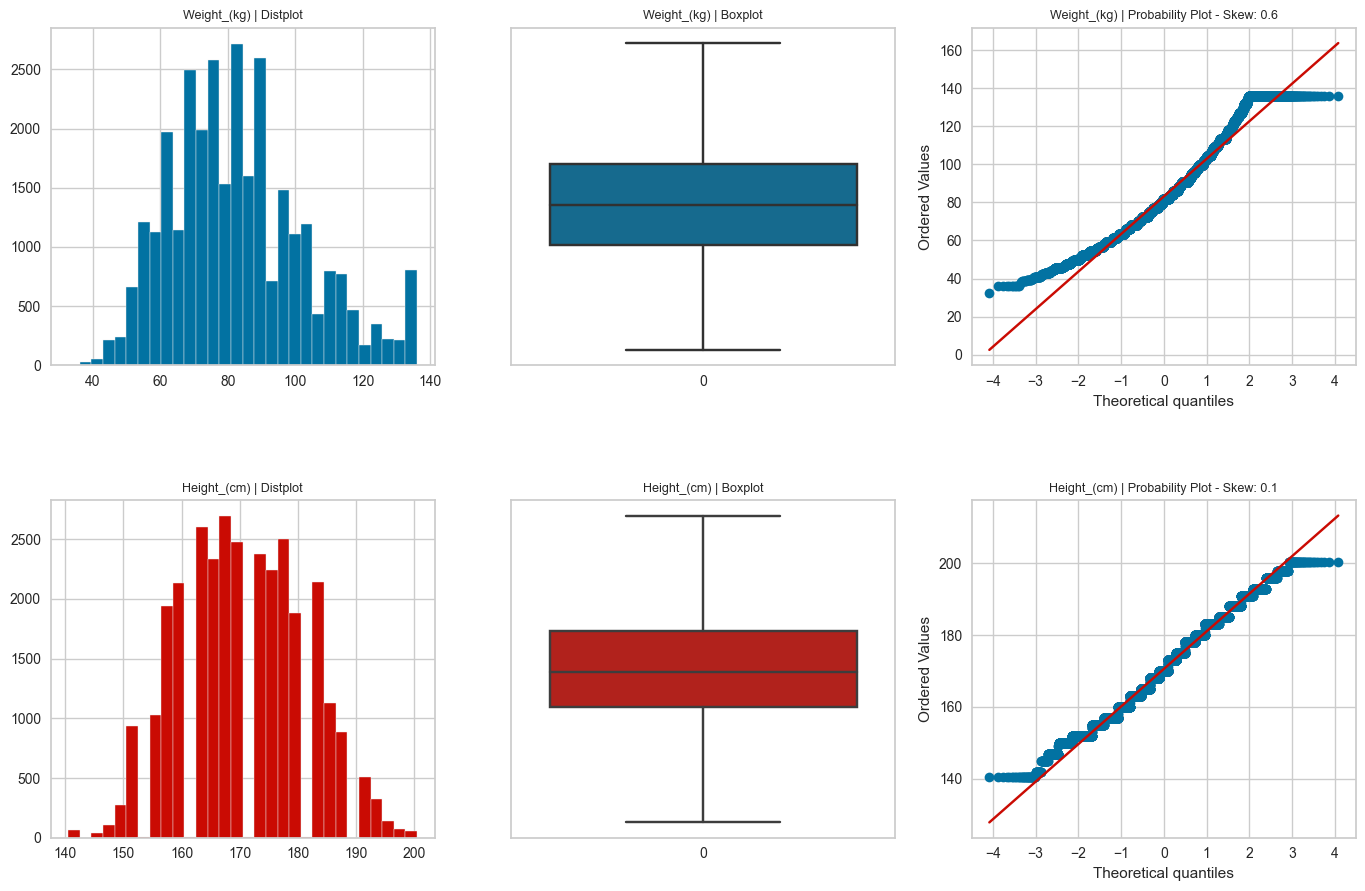

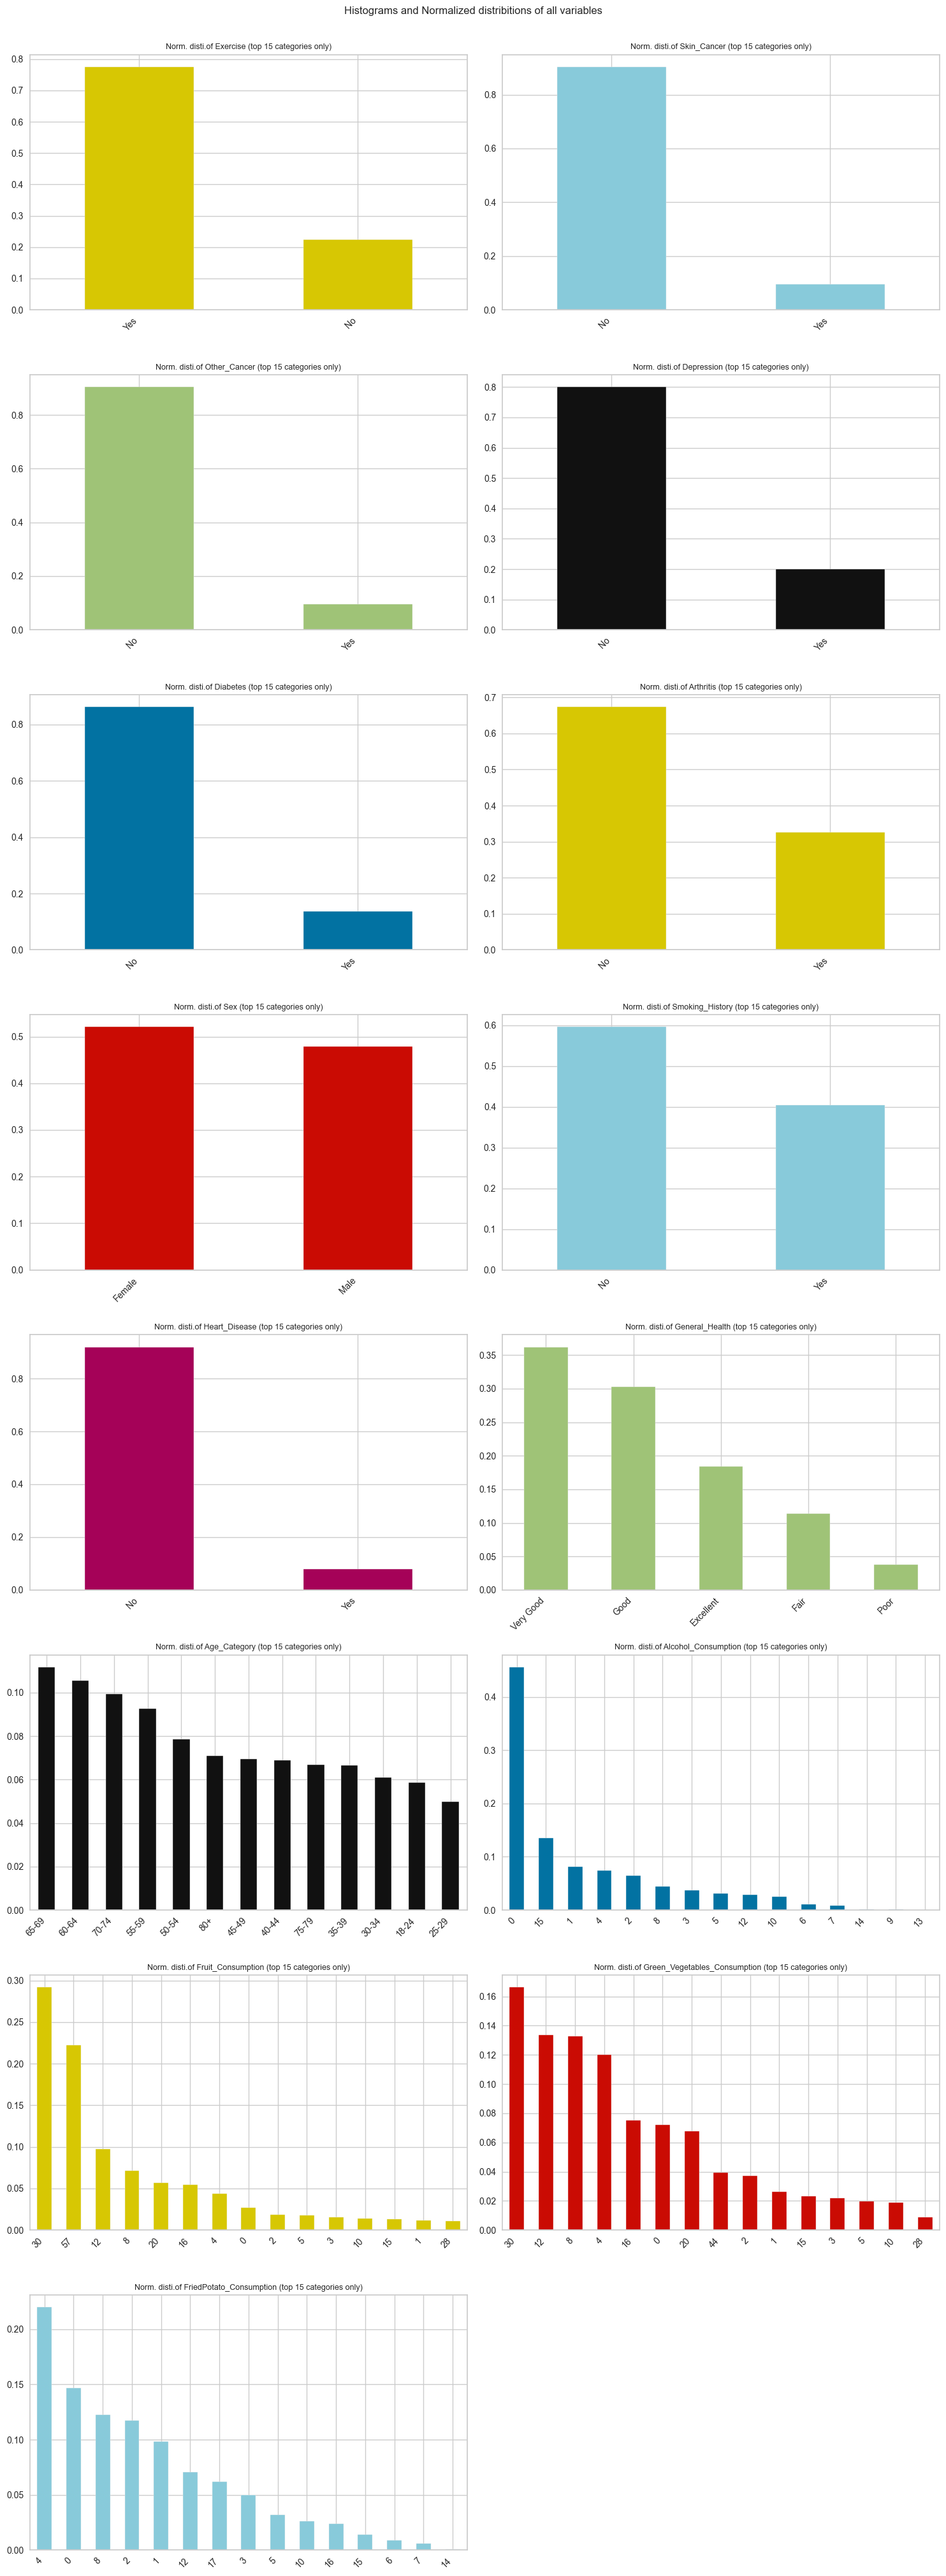

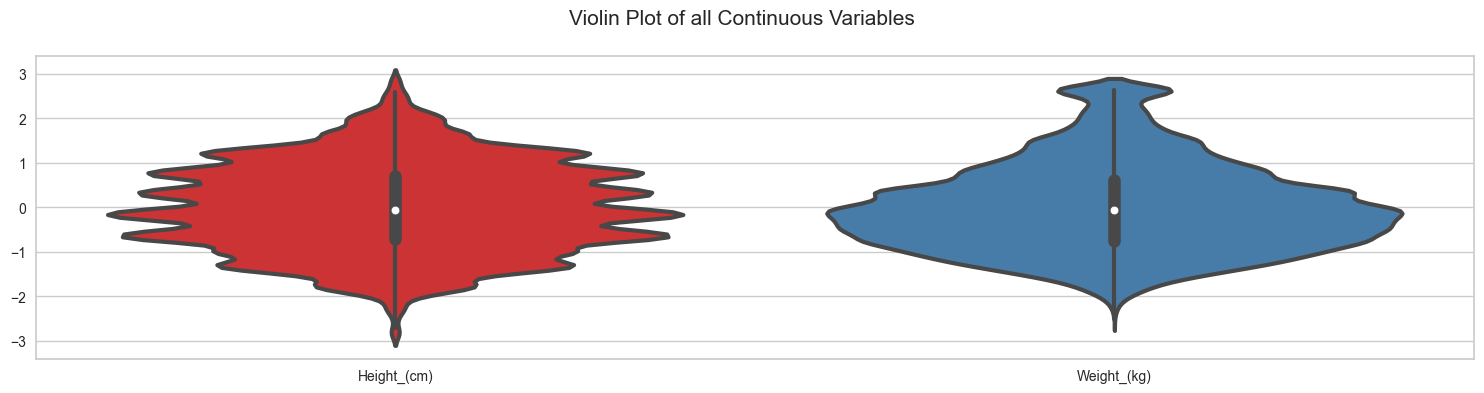

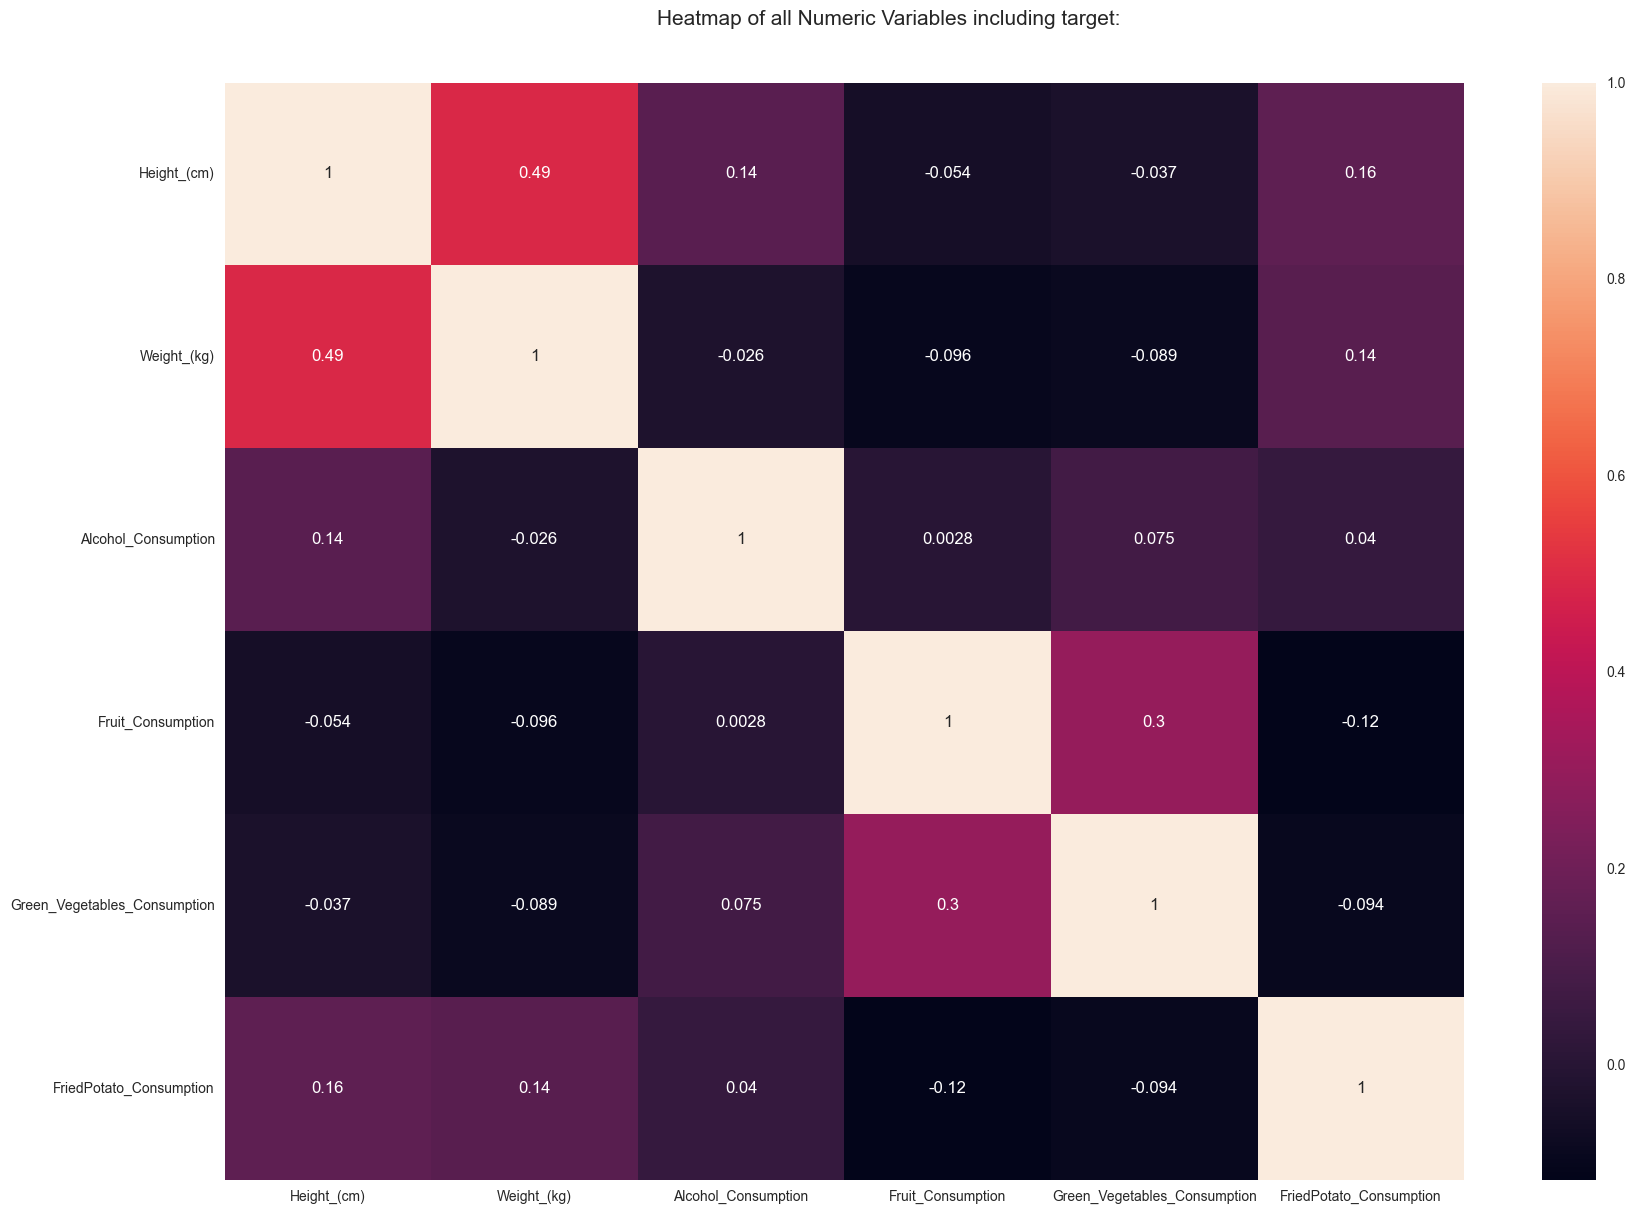

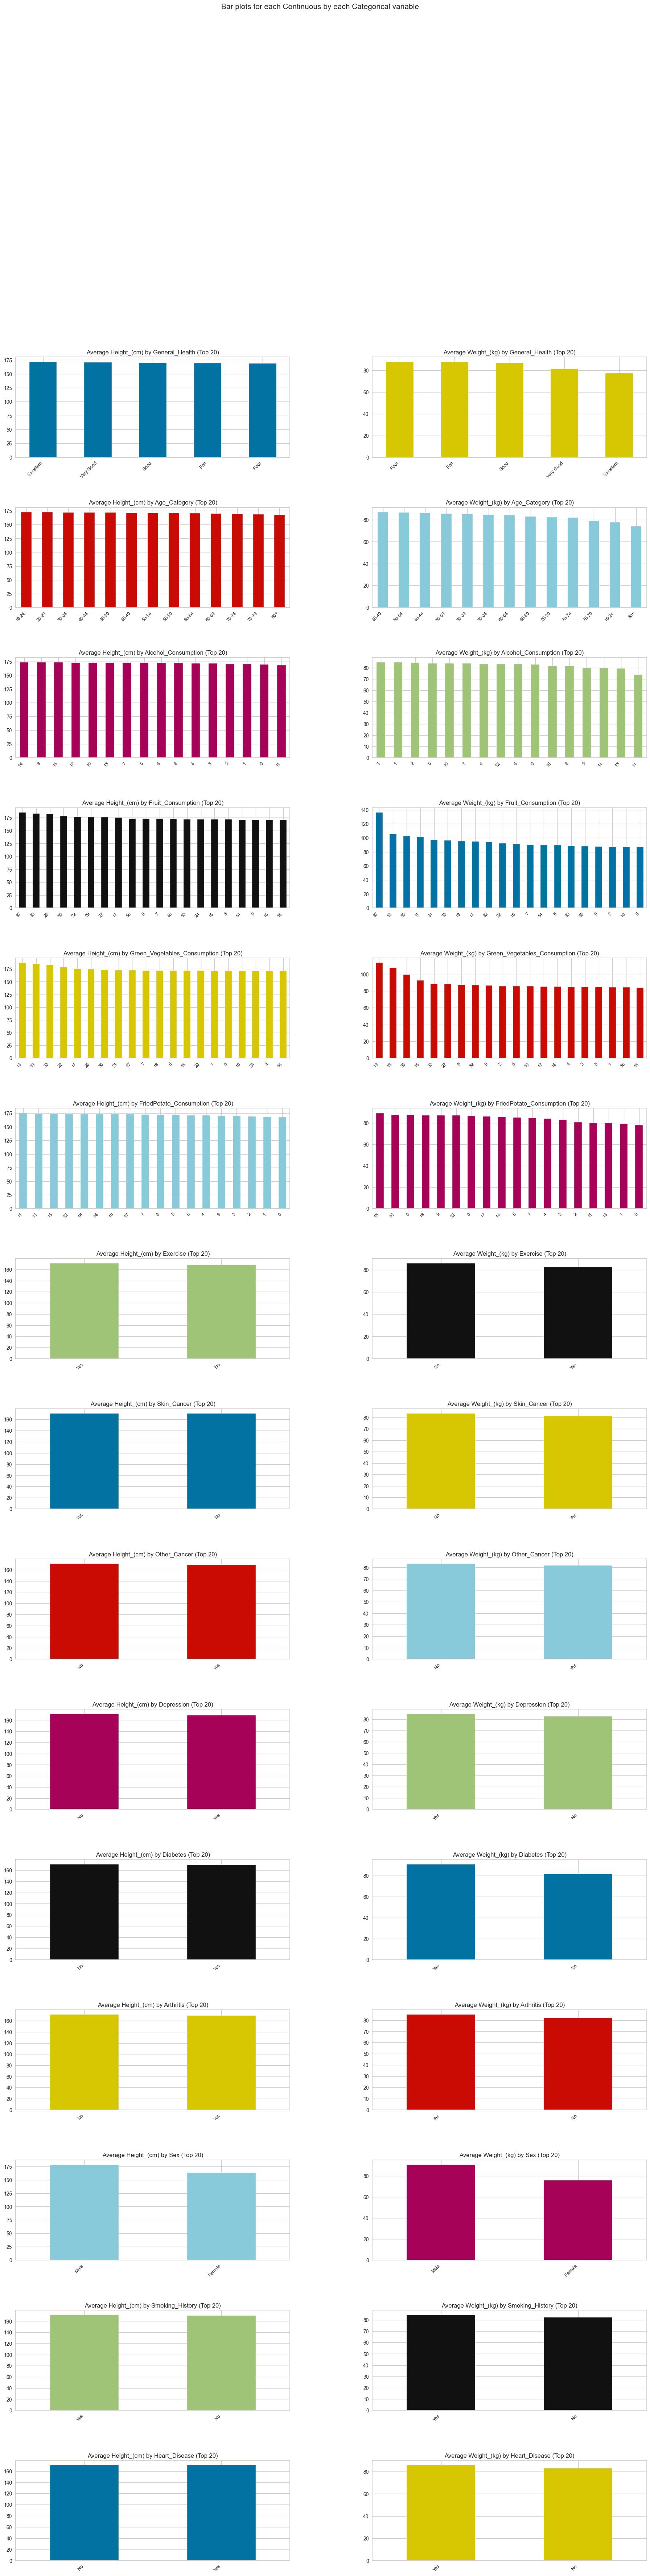

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [26]:
# Initialize AutoViz
AV = AutoViz_Class()

# Run AutoViz on the training_data DataFrame
report_after_processing = AV.AutoViz(filename="", dfte=validation_data, verbose=1)

In [28]:
# Setup the modified experiment
modified_clf = setup(
    data=training_data,
    target='Heart_Disease',
    normalize=True,
    remove_outliers=True,
    session_id=123
)


# Modeling

In [61]:
best_model = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [64]:
from pycaret.classification import create_model, blend_models, evaluate_model

# Create individual models
print('The scores for lightgbm are:')
lightgbm_model = create_model('lightgbm')

print('The scores for gbc are:')
gbc_model = create_model('gbc')

print('The scores for qda are:')
qda_model = create_model('qda')

print('The scores for nb are:')
nb_model = create_model('nb')

# Blend the models using soft voting
print('The scores for blended model are:')
blended_model = blend_models(estimator_list=[lightgbm_model, qda_model, nb_model], method='soft')

# Evaluate the blended model
evaluate_model(blended_model)

The scores for lightgbm are:


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The scores for gbc are:


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The scores for qda are:


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The scores for nb are:


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The scores for blended model are:


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [65]:
from pycaret.classification import tune_model

# Tune the individual models
print('The scores for tuned_lightgbm are:')
tuned_lightgbm = tune_model(lightgbm_model, optimize='Accuracy')

print('The scores for tuned_gbc are:')
tuned_gbc = tune_model(gbc_model, optimize='Accuracy')

print('The scores for tuned_qda are:')
tuned_qda = tune_model(qda_model, optimize='Recall')

print('The scores for tuned_nb are:')
tuned_nb = tune_model(nb_model, optimize='Recall')

# Blend the tuned models
print('The scores for tuned_blended_model are:')
tuned_blended_model = blend_models(estimator_list=[tuned_lightgbm, tuned_qda, tuned_nb], method='soft')

# Evaluate the tuned blended model
evaluate_model(tuned_blended_model)

The scores for tuned_lightgbm are:


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The scores for tuned_gbc are:


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
The scores for tuned_qda are:


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
The scores for tuned_nb are:


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
The scores for tuned_blended_model are:


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
# Predictions using the standard blended model
predictions_standard = predict_model(blended_model1, data=validation_data)

# Predictions using the tuned blended model
# predictions_tuned = predict_model(tuned_blended_model, data=validation_data)


In [77]:
stacked_model = stack_models(estimator_list=[lightgbm_model, qda_model, nb_model],
                              meta_model=lightgbm_model,
                              optimize='precision'
)

get_metrics()

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Name    Display Name  \
ID                                  
acc         Accuracy   Accuracy     
auc              AUC        AUC     
recall        Recall     Recall     
precision  Precision      Prec.     
f1                F1         F1     
kappa          Kappa      Kappa     
mcc              MCC        MCC     

                                            Score Function                                    \
ID                                                                                             
acc                                          <function accuracy_score at 0x0000018F6BBE3400>   
auc        <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65EFE0>   
recall     <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65D330>   
precision  <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65D480>   
f1         <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65ECB0>   
kappa                                     <function cohen_kappa_score at 0x0000018F6BBE3520>   
mcc                                       <function matthews_corrcoef at 0x0000018F6BBE3640>   

                                                        Scorer                                               \
ID                                                                                                            
acc                                                                                                accuracy   
auc        make_scorer(roc_auc_score, needs_proba=True, error_score=0.0, average=weighted, multi_class=ovr)   
recall                      make_scorer(recall_score, average=weighted, pos_label=Yes, labels=['No' 'Yes'])   
precision                make_scorer(precision_score, average=weighted, pos_label=Yes, labels=['No' 'Yes'])   
f1                              make_scorer(f1_score, average=weighted, pos_label=Yes, labels=['No' 'Yes'])   
kappa                                                                        make_scorer(cohen_kappa_score)   
mcc                                                                          make_scorer(matthews_corrcoef)   

             Target    \
ID                      
acc              pred   
auc        pred_proba   
recall           pred   
precision        pred   
f1               pred   
kappa            pred   
mcc              pred   

                                           Args                                  \
ID                                                                                
acc                                                                          {}   
auc                               {'average': 'weighted', 'multi_class': 'ovr'}   
recall     {'average': 'weighted', 'pos_label': 'Yes', 'labels': ['No', 'Yes']}   
precision  {'average': 'weighted', 'pos_label': 'Yes', 'labels': ['No', 'Yes']}   
f1         {'average': 'weighted', 'pos_label': 'Yes', 'labels': ['No', 'Yes']}   
kappa                                                                        {}   
mcc                                                                          {}   

           Greater is Better  Multiclass  Custom  
ID                                                
acc              True            True      False  
auc              True            True      False  
recall           True            True      False  
precision        True            True      False  
f1               True            True      False  
kappa            True            True      False  
mcc              True            True      False

In [78]:
stacked_model2 = stack_models(estimator_list=[lightgbm_model, qda_model, nb_model],
                              meta_model=qda_model,
                              optimize='precision'
)

get_metrics()

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Name    Display Name  \
ID                                  
acc         Accuracy   Accuracy     
auc              AUC        AUC     
recall        Recall     Recall     
precision  Precision      Prec.     
f1                F1         F1     
kappa          Kappa      Kappa     
mcc              MCC        MCC     

                                            Score Function                                    \
ID                                                                                             
acc                                          <function accuracy_score at 0x0000018F6BBE3400>   
auc        <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65EFE0>   
recall     <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65D330>   
precision  <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65D480>   
f1         <pycaret.internal.metrics.BinaryMulticlassScoreFunc object at 0x0000018F2D65ECB0>   
kappa                                     <function cohen_kappa_score at 0x0000018F6BBE3520>   
mcc                                       <function matthews_corrcoef at 0x0000018F6BBE3640>   

                                                        Scorer                                               \
ID                                                                                                            
acc                                                                                                accuracy   
auc        make_scorer(roc_auc_score, needs_proba=True, error_score=0.0, average=weighted, multi_class=ovr)   
recall                      make_scorer(recall_score, average=weighted, pos_label=Yes, labels=['No' 'Yes'])   
precision                make_scorer(precision_score, average=weighted, pos_label=Yes, labels=['No' 'Yes'])   
f1                              make_scorer(f1_score, average=weighted, pos_label=Yes, labels=['No' 'Yes'])   
kappa                                                                        make_scorer(cohen_kappa_score)   
mcc                                                                          make_scorer(matthews_corrcoef)   

             Target    \
ID                      
acc              pred   
auc        pred_proba   
recall           pred   
precision        pred   
f1               pred   
kappa            pred   
mcc              pred   

                                           Args                                  \
ID                                                                                
acc                                                                          {}   
auc                               {'average': 'weighted', 'multi_class': 'ovr'}   
recall     {'average': 'weighted', 'pos_label': 'Yes', 'labels': ['No', 'Yes']}   
precision  {'average': 'weighted', 'pos_label': 'Yes', 'labels': ['No', 'Yes']}   
f1         {'average': 'weighted', 'pos_label': 'Yes', 'labels': ['No', 'Yes']}   
kappa                                                                        {}   
mcc                                                                          {}   

           Greater is Better  Multiclass  Custom  
ID                                                
acc              True            True      False  
auc              True            True      False  
recall           True            True      False  
precision        True            True      False  
f1               True            True      False  
kappa            True            True      False  
mcc              True            True      False

Since there wasn't much of a difference between results of tuned models vs the standard models, at least as far as this project goes, there doesnt appear to be much benefit in using the tuned blended model. Sticking with the standard blended model should suffice, however, if this were to be a production model, of course more further tuning and more data would be required.

In [54]:
# Finalize Model
from pycaret.classification import finalize_model

final_blended_model = finalize_model(blended_model1)

In [53]:
# Save model for future use
save_model(blended_model1, 'final_blended_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Ramon\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Height_(cm)', 'Weight_(kg)',
                                              'Alcohol_Consumption',
                                              'Fruit_Consumption',
                                              'Green_Vegetables_Consumption'...
                                                               reg_lambda=0.0,
                                                               subsample=1.0,
                                                               subsample_for_bin=200000,
                                                               subsample_freq=0)),
                   

In [55]:
from pycaret.classification import load_model

# Load the saved model
loaded_model = load_model('final_blended_model')

# Predict on the validation set to verify validity of model saved
predictions_loaded_model = predict_model(loaded_model, data=validation_data)

Transformation Pipeline and Model Successfully Loaded


# Conclusion

- Accuracy (63.11%): Accuracy indicates the overall percentage of correct predictions made by the model. An accuracy of 63.11% shows that the model is correct roughly two-thirds of the time. This may be considered moderate, depending on the specific application and the balance of the classes.

- AUC (82.99%): The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) is a measure of how well the model can distinguish between the two classes. An AUC of 82.99% suggests a good ability to discriminate between those with and without heart disease.

- Recall (Sensitivity) (87.11%): Recall represents the proportion of actual positive cases (people with heart disease) that were correctly identified by the model. A recall of 87.11% means the model is doing well in identifying most of the actual positive cases.

- Precision (16.34%): Precision represents the proportion of predicted positive cases that were actually positive. A precision of 16.34% is quite low, indicating that a significant number of false positive predictions are made by the model.

- F1 Score (27.52%): The F1 score is the harmonic mean of precision and recall, providing a balance between the two. The relatively low F1 score suggests that the model's balance between precision and recall may not be ideal.

- Kappa (16.17%): Cohen's Kappa measures the agreement between predicted and actual values, corrected for chance. A low kappa score indicates a moderate level of agreement.

- MCC (26.44%): The Matthews Correlation Coefficient (MCC) provides a balanced measure of binary classification performance. An MCC value of 26.44% is moderate, indicating room for improvement.

Summary:
The model is strong in terms of sensitivity, capturing most of the true positive cases.
The low precision indicates a high rate of false positives, where the model incorrectly predicts heart disease.
The moderate accuracy, AUC, and MCC suggest that the model's overall performance is acceptable but could benefit from further tuning or different approaches.
In a medical context like predicting heart disease, achieving high sensitivity is often crucial, as failing to identify a positive case can have serious consequences. However, the low precision means that many individuals might be falsely identified as having heart disease, leading to unnecessary further testing or anxiety.

The blend of models and the chosen method of tuning might need further refinement, focusing on the specific needs of the application and the balance between sensitivity and precision. An understanding of the costs associated with false positives and false negatives would guide this tuning process.

Overall, we have identified factors that demonstrate a significant correlation with heart disease, leading to insights into its potential determinants. The blended model we've constructed shows a commendable ability to predict whether or not someone has heart disease, particularly excelling in sensitivity, where it correctly identifies the majority of positive cases. However, the model's precision is relatively low, indicating a higher rate of false positives. This suggests that while the model can be a valuable tool in initial screenings, further confirmatory testing would likely be necessary to validate the predictions. While the results are promising and statistically significant, there is room for improvement. With more data, further tuning, and perhaps the exploration of other techniques, the model's performance could be enhanced, strengthening its reliability in predicting heart disease based on this dataset.

# Appendix

CDC statistics: https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20Disease%20in%20the%20United%20States&text=One%20person%20dies%20every%2033,United%20States%20from%20cardiovascular%20disease.&text=About%20695%2C000%20people%20in%20the,1%20in%20every%205%20deaths.

